In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.stats as st
import sklearn.linear_model as lm
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [3]:
d = pd.read_csv("clean.csv")

In [4]:
pd.options.display.max_rows=3000
#print(d)
print(d.tail(10))
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min
2373  2019-11-24    14.00   1:37:02  6.930952
2374  2019-11-27     5.02   0:36:08  7.197875
2375  2019-11-28     6.15   0:42:22  6.888889
2376  2019-11-29     6.26   0:46:15  7.388179
2377  2019-11-30     3.11   0:15:44  5.058950
2378  2019-11-30     4.90       NaN       NaN
2379  2019-12-03     7.28   0:53:04  7.289377
2380  2019-12-04     9.58       NaN       NaN
2381  2019-12-05     7.00   0:50:33  7.221429
2382  2019-12-06     4.09   0:27:53  6.817441


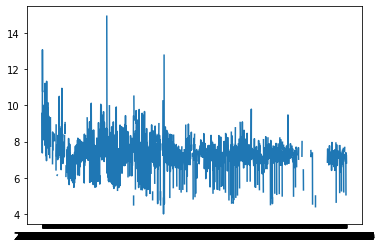

In [36]:
plt.plot(d['Date'], d['pace_min'])
plt.show()

(array([  40.,  121.,  358., 1025.,  215.,   44.]),
 array([ 4,  5,  6,  7,  8,  9, 10]),
 <a list of 6 Patch objects>)

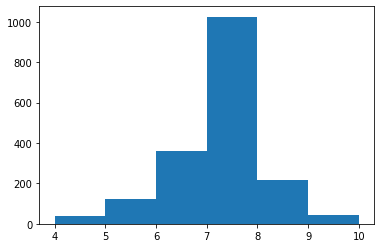

In [5]:
plt.hist(d['pace_min'], bins = [4,5,6,7,8,9,10])

In [6]:
k5 = d[(d['Mileage'] > 3.09) & (d['Mileage'] < 3.12)]
pd.options.display.max_rows=130
print(k5)
pd.options.display.max_rows=20

            Date  Mileage time_corr  pace_min
0     2009-04-25     3.10   0:29:38  9.559140
1     2009-11-21     3.10   0:22:51  7.370968
20    2010-04-24     3.10   0:24:12  7.806452
67    2010-08-20     3.10   0:20:59  6.768817
69    2010-08-24     3.10   0:21:15  6.854839
74    2010-09-01     3.10   0:21:01  6.779570
80    2010-09-13     3.10   0:21:10  6.827957
82    2010-09-18     3.10   0:19:27  6.274194
84    2010-09-21     3.10   0:20:26  6.591398
92    2010-10-02     3.10   0:19:39  6.338710
95    2010-10-07     3.10   0:19:42  6.354839
99    2010-10-15     3.10   0:19:57  6.435484
107   2010-10-29     3.10   0:19:01  6.134409
119   2010-12-18     3.10   0:25:00  8.064516
124   2011-01-04     3.10   0:22:32  7.268817
125   2011-01-07     3.10   0:24:18  7.838710
126   2011-01-13     3.10   0:23:00  7.419355
136   2011-02-13     3.10   0:19:59  6.446237
147   2011-06-10     3.10   0:21:40  6.989247
149   2011-06-17     3.10   0:21:56  7.075269
150   2011-06-21     3.10   0:22:1

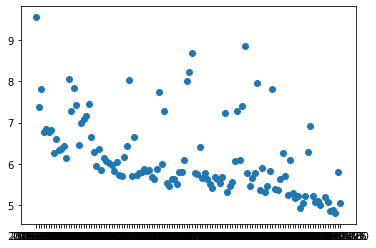

In [7]:
plt.scatter(k5['Date'], k5['pace_min'])
plt.show()

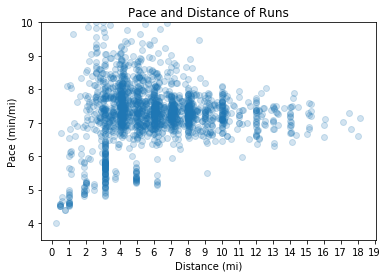

<Figure size 432x288 with 0 Axes>

In [8]:
plt.ylim(3.5, 10)
plt.scatter(d['Mileage'], d['pace_min'], alpha=0.2)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlabel("Distance (mi)")
plt.ylabel("Pace (min/mi)")
plt.title("Pace and Distance of Runs")
plt.show()
plt.savefig("pace_distance.png")

In [9]:
dna = d.dropna()
print(dna)

            Date  Mileage time_corr   pace_min
0     2009-04-25     3.10   0:29:38   9.559140
1     2009-11-21     3.10   0:22:51   7.370968
2     2010-01-04     1.30   0:17:00  13.076923
3     2010-01-05     2.60   0:28:00  10.769231
4     2010-01-07     2.60   0:28:00  10.769231
6     2010-01-14     2.60   0:26:00  10.000000
7     2010-01-16     4.05   0:35:48   8.839506
8     2010-01-19     2.60   0:24:00   9.230769
9     2010-01-25     2.66   0:24:15   9.116541
10    2010-01-26     2.60   0:24:19   9.352564
...          ...      ...       ...        ...
2370  2019-11-21     6.21   0:44:23   7.147075
2371  2019-11-22     8.22   0:58:04   7.064071
2373  2019-11-24    14.00   1:37:02   6.930952
2374  2019-11-27     5.02   0:36:08   7.197875
2375  2019-11-28     6.15   0:42:22   6.888889
2376  2019-11-29     6.26   0:46:15   7.388179
2377  2019-11-30     3.11   0:15:44   5.058950
2379  2019-12-03     7.28   0:53:04   7.289377
2381  2019-12-05     7.00   0:50:33   7.221429
2382  2019-12

In [10]:
st.pearsonr(dna['Mileage'], dna['pace_min'])

(0.06038241790413832, 0.010039784744218246)

In [11]:
dna.dtypes

Date          object
Mileage      float64
time_corr     object
pace_min     float64
dtype: object

In [12]:
x = np.array(dna['Mileage'].tolist())
x = x.reshape(-1, 1)
y = np.array(dna['pace_min'].tolist())
y = y.reshape(-1, 1)
model = lm.LinearRegression().fit(x, y)

In [13]:
r_sq = model.score(x,y)
print('R-Squared:', r_sq)

R-Squared: 0.003646036391950269


In [14]:
print(d)

            Date  Mileage time_corr   pace_min
0     2009-04-25     3.10   0:29:38   9.559140
1     2009-11-21     3.10   0:22:51   7.370968
2     2010-01-04     1.30   0:17:00  13.076923
3     2010-01-05     2.60   0:28:00  10.769231
4     2010-01-07     2.60   0:28:00  10.769231
5     2010-01-11     1.30       NaN        NaN
6     2010-01-14     2.60   0:26:00  10.000000
7     2010-01-16     4.05   0:35:48   8.839506
8     2010-01-19     2.60   0:24:00   9.230769
9     2010-01-25     2.66   0:24:15   9.116541
...          ...      ...       ...        ...
2373  2019-11-24    14.00   1:37:02   6.930952
2374  2019-11-27     5.02   0:36:08   7.197875
2375  2019-11-28     6.15   0:42:22   6.888889
2376  2019-11-29     6.26   0:46:15   7.388179
2377  2019-11-30     3.11   0:15:44   5.058950
2378  2019-11-30     4.90       NaN        NaN
2379  2019-12-03     7.28   0:53:04   7.289377
2380  2019-12-04     9.58       NaN        NaN
2381  2019-12-05     7.00   0:50:33   7.221429
2382  2019-12

In [18]:
ds = d["Date"].str.split(pat = "-", expand = True)
dsd = pd.concat([d, ds], axis=1, sort=False)
ymd = dsd.rename(columns={0: "year", 1: "month", 2: "day"})
print(ymd)

            Date  Mileage time_corr   pace_min  year month day
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07
5     2010-01-11     1.30       NaN        NaN  2010    01  11
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25
...          ...      ...       ...        ...   ...   ...  ..
2373  2019-11-24    14.00   1:37:02   6.930952  2019    11  24
2374  2019-11-27     5.02   0:36:08   7.197875  2019    11  27
2375  2019-11-28     6.15   0:42:22   6.888889  2019    11  28
2376  2019-11-29     6.26   0:46:15   7.388179  2019   

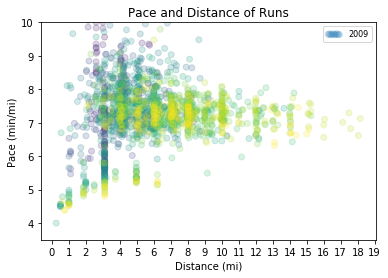

<Figure size 432x288 with 0 Axes>

In [41]:
graph = plt.scatter(ymd['Mileage'], ymd['pace_min'], c=legend, label=legend, alpha=0.2)
legend=pd.to_numeric(ymd['year'])
plt.ylim(3.5, 10)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlabel("Distance (mi)")
plt.ylabel("Pace (min/mi)")
plt.title("Pace and Distance of Runs")
plt.legend(ymd['year'],
           scatterpoints=10,
           loc='upper right',
           ncol=3,
           fontsize=8)
plt.show()
#plt.savefig("pace_distance.png")

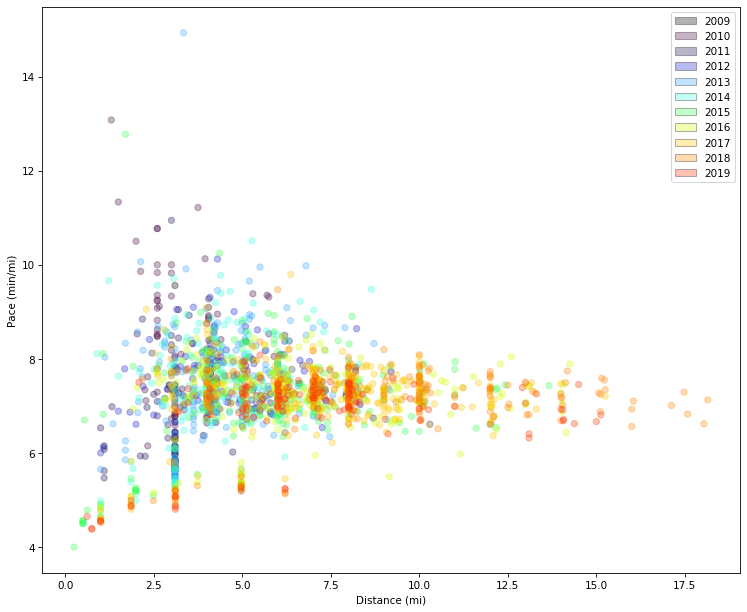

In [59]:
col_dict = {'2009':'#000000', '2010':'#450842', '2011':'#1B0951', '2012':'#1620CD' , '2013':'#3AA6FF' , '2014':'#3AFFDE' , '2015':'#3AFF51' , '2016':'#D0FF00', '2017':'#FFC600', '2018':'#FF8600', '2019':'#FF3600'}
ymd['colcol'] = ymd['year'].map(col_dict)

fig = plt.figure(figsize=(12,10),dpi=75)
ax = fig.gca()
ax.scatter(ymd['Mileage'],ymd['pace_min'],c=ymd['colcol'],alpha=0.3)
ax.set_xlabel('Distance (mi)')
ax.set_ylabel('Pace (min/mi)')

#retrieve values from color dictionary and attribute it to corresponding labels
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in col_dict.items()]
ax.legend(handles = leg_el)
plt.savefig("pace_distance.png")